# PROYECTO 2


### INTEGRANTES
Luisa María Hernández Quintero

Carolina Taborda Vargas

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from tabulate import tabulate
from scipy.stats import ttest_rel
from collections import Counter
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.sandbox.stats.runs import runstest_1samp # para la prueba Runs
import statsmodels.api as sm 


## Parte 1

#### Inspección del archivo y carga en python 

In [2]:
#Lectura de datos 
df = pd.read_excel("FLIR_groups1and2.xlsx", header=2) #Leer el excel 
#print(tabulate(df, headers='keys', tablefmt='github', showindex=True))
# Llenar valores nulos con la media
g = ['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4','Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4','T_Max1', 'T_Max2', 'T_Max3', 'T_Max4','T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']
for i in g: 
    df[i].fillna(df[i].mean(), inplace=True)
print(tabulate(df, headers='keys', tablefmt='github', showindex=True))

C:\Users\yamhile\AppData\Local\Temp\ipykernel_16856\974107499.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mean(), inplace=True)


|      | SubjectID   |   Unnamed: 1 |   T_offset1 |   Max1R13_1 |   Max1L13_1 |   aveAllR13_1 |   aveAllL13_1 |   T_RC1 |   T_RC_Dry1 |   T_RC_Wet1 |   T_RC_Max1 |   T_LC1 |   T_LC_Dry1 |   T_LC_Wet1 |   T_LC_Max1 |   RCC1 |   LCC1 |   canthiMax1 |   canthi4Max1 |   T_FHCC1 |   T_FHRC1 |   T_FHLC1 |   T_FHBC1 |   T_FHTC1 |   T_FH_Max1 |   T_FHC_Max1 |   T_Max1 |   T_OR1 |   T_OR_Max1 |   Unnamed: 29 |   T_offset2 |   Max1R13_2 |   Max1L13_2 |   aveAllR13_2 |   aveAllL13_2 |   T_RC2 |   T_RC_Dry2 |   T_RC_Wet2 |   T_RC_Max2 |   T_LC2 |   T_LC_Dry2 |   T_LC_Wet2 |   T_LC_Max2 |   RCC2 |   LCC2 |   canthiMax2 |   canthi4Max2 |   T_FHCC2 |   T_FHRC2 |   T_FHLC2 |   T_FHBC2 |   T_FHTC2 |   T_FH_Max2 |   T_FHC_Max2 |   T_Max2 |   T_OR2 |   T_OR_Max2 |   Unnamed: 57 |   T_offset3 |   Max1R13_3 |   Max1L13_3 |   aveAllR13_3 |   aveAllL13_3 |   T_RC3 |   T_RC_Dry3 |   T_RC_Wet3 |   T_RC_Max3 |   T_LC3 |   T_LC_Dry3 |   T_LC_Wet3 |   T_LC_Max3 |   RCC3 |   LCC3 |   canthiMax3 |   canthi4Max3 |  

In [4]:
#Formación de nuevo DataFrame 
# Calcular los promedios de las zonas térmicas
columna1 = df[['Max1R13_1', 'Max1R13_2', 'Max1R13_3', 'Max1R13_4']].mean(axis=1)
columna2 = df[['Max1L13_1', 'Max1L13_2', 'Max1L13_3', 'Max1L13_4']].mean(axis=1)
columna3 = df[['T_Max1', 'T_Max2', 'T_Max3', 'T_Max4']].mean(axis=1)
columna4 = df[['T_FHCC1', 'T_FHCC2', 'T_FHCC3', 'T_FHCC4']].mean(axis=1)

# Variable aveOralM
list_1 = df['aveOralM']

# Crear nuevo DataFrame con los promedios
df_promedio = pd.DataFrame({
    'Prom_Max1R13': columna1,
    'Prom_Max1L13': columna2,
    'Prom_T_Max': columna3,
    'Prom_TF_HCC': columna4,
    'aveOral': list_1
})

# Mostrar tabla con promedios
print("Promedios de las zonas térmicas:\n")
print(tabulate(df_promedio, headers='keys', tablefmt='github', showindex=True))

Promedios de las zonas térmicas:

|      |   Prom_Max1R13 |   Prom_Max1L13 |   Prom_T_Max |   Prom_TF_HCC |   aveOral |
|------|----------------|----------------|--------------|---------------|-----------|
|    0 |        35.03   |        35.3775 |      35.6925 |       33.5775 |     36.59 |
|    1 |        34.55   |        34.52   |      35.175  |       34.0325 |     37.19 |
|    2 |        35.6525 |        35.5175 |      35.9125 |       34.9    |     37.34 |
|    3 |        35.2225 |        35.6125 |      35.72   |       34.44   |     37.09 |
|    4 |        35.545  |        35.665  |      35.895  |       35.09   |     37.04 |
|    5 |        35.1325 |        35.2025 |      35.85   |       34.1925 |     36.99 |
|    6 |        35.2825 |        35.615  |      35.8375 |       33.4775 |     36.59 |
|    7 |        35.105  |        34.87   |      35.68   |       33.7275 |     36.49 |
|    8 |        35.3075 |        35.4225 |      35.8525 |       35.1475 |     36.59 |
|    9 |        35.8

##### Analisis: 
Dado el diseño del experimento, la mejor opción para evaluar la equivalencia entre los métodos de medición es a través de la diferencia entre las temperaturas obtenidas con el termógrafo y la temperatura oral. Esto se debe a que se analiza  datos dependientes, correspondientes a las mismas personas, y las dos mediciones buscan capturar la misma variable (temperatura). Al centrarse en las diferencias, se ignora la variabilidad entre sujetos y nos enfocamos el análisis exclusivamente en la diferencia entre los dos métodos de medición.
Principalmente este metodo evita que se interprete la variación como una diferencia fisiológica entre individuos, y permite que los estudios se centren en cómo los métodos de medición podrían estar variando en lugar de atribuir esas variaciones a factores biológicos o individuales.

In [5]:
#Obtendiendo diferencia entre temepraturas obtenidas del termografo y temperatura oral 
diff_Max1R13=  list_1-columna1
diff_Max1L13 = list_1-columna2
diff_T_Max= list_1-columna3
diff_TF_HCC= list_1-columna4
#Creando un nuevo dataframe
df_dif = pd.DataFrame({
    'diff_Max1R13': diff_Max1R13,
    'diff_Max1L13': diff_Max1L13,
    'diff_T_Max': diff_T_Max,
    'diff_TF_HCC': diff_TF_HCC
})
print(tabulate(df_dif, headers='keys', tablefmt='github', showindex=True))

|      |   diff_Max1R13 |   diff_Max1L13 |   diff_T_Max |   diff_TF_HCC |
|------|----------------|----------------|--------------|---------------|
|    0 |       1.56     |       1.2125   |     0.8975   |       3.0125  |
|    1 |       2.64     |       2.67     |     2.015    |       3.1575  |
|    2 |       1.6875   |       1.8225   |     1.4275   |       2.44    |
|    3 |       1.8675   |       1.4775   |     1.37     |       2.65    |
|    4 |       1.495    |       1.375    |     1.145    |       1.95    |
|    5 |       1.8575   |       1.7875   |     1.14     |       2.7975  |
|    6 |       1.3075   |       0.975    |     0.7525   |       3.1125  |
|    7 |       1.385    |       1.62     |     0.81     |       2.7625  |
|    8 |       1.2825   |       1.1675   |     0.7375   |       1.4425  |
|    9 |       1        |       1.125    |     0.685    |       1.635   |
|   10 |       1.265    |       1.34     |     0.735    |       2.5075  |
|   11 |       1.355    |       1.695 

#### Análisis exploratorio de datos

In [7]:
#Construcción de un DataFrame de los estadisticos de las varibles 

def valores_estadisticos(valores):  #Funcion para calculo de metricas estadisticas

    """
    Función: Calcula varias medidas estadísticas descriptivas a partir de una lista o array de valores.
    Parámetros:
    valores (list): Conjunto de datos numéricos o categóricos.

    Retorna:
    list: Una lista con las medidas estadísticas solicitadas en orden:
    Notas:
    - Si los datos no son numéricos, se intentará obtener únicamente la moda.
    - En caso de que no exista una moda única, se devuelve el string 'No única'.
    """
    # Convertir a numpy array por seguridad
    valores = np.array(valores)

    # Si no son numéricos (excepto moda), devolver NaN
    if not np.issubdtype(valores.dtype, np.number):
        media = mediana = sd = mad = varianza = iqr = cv = cvm = np.nan
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
    else:
        media = np.mean(valores)
        mediana = np.median(valores)
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
        sd = np.std(valores, ddof=1)
        mad = np.mean(np.abs(valores - np.mean(valores)))
        varianza = np.var(valores, ddof=1)
        iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
        cv = sd / media if media != 0 else np.nan
        cvm = mad / media if media != 0 else np.nan

    return [media, mediana, moda, sd, mad, varianza, iqr, cv, cvm]

# Calculamos los valores estadísticos por variable
estadisticas = {nombre: valores_estadisticos(lista) for nombre, lista in df_dif.items()}

# Convertimos a DataFrame con los nombres de filas
estadisticas_df = pd.DataFrame(estadisticas, index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"])

# Mostramos el resultado
print(tabulate(estadisticas_df, headers='keys', tablefmt='github', showindex=True))

|          |   diff_Max1R13 |   diff_Max1L13 |   diff_T_Max |   diff_TF_HCC |
|----------|----------------|----------------|--------------|---------------|
| Media    |       1.43047  |       1.4152   |     0.940356 |      2.45411  |
| Mediana  |       1.4225   |       1.395    |     0.9325   |      2.3925   |
| Moda     |       1.4825   |       1.3975   |     1.0175   |      2.4125   |
| SD       |       0.392924 |       0.385599 |     0.274549 |      0.592557 |
| MAD      |       0.31151  |       0.307107 |     0.216025 |      0.446426 |
| Varianza |       0.154389 |       0.148687 |     0.075377 |      0.351124 |
| IQR      |       0.525625 |       0.527346 |     0.365    |      0.695158 |
| CV       |       0.274682 |       0.27247  |     0.291963 |      0.241455 |
| CVM      |       0.217768 |       0.217007 |     0.229727 |      0.18191  |



Analizando el comportamiento de las métricas calculadas en las variables se puede ver una variación  en los datos de la SD y la MAD de cada uno de ellos; donde el valor de SD es mayor para todos los casos en comparación con el valor de la MAD. Lo que puede expresar este resultado es que haya datos atípicos en el estudio. 

##### Confimacion de datos atipicos 

In [ ]:
#Uso de rango intercuartil para determinar si hay datos atipicos 
def analizar_outliers_con_grafico(serie, nombre):
    """
    Función para analizar outliers en una serie numérica de pandas.
    
    Argumentos:
    - serie: una columna o serie de pandas (por ejemplo, df["edad"]) que contenga datos numéricos.
    - nombre: una cadena de texto con el nombre descriptivo de la serie (para mostrarlo en los gráficos y prints).
    """
    
    # Convertimos la serie en un array de NumPy
    datos = np.array(serie)

    # Eliminamos los valores NaN para evitar errores en el análisis
    datos_validos = datos[~np.isnan(datos)]

    # Si todos los valores son NaN, mostramos un mensaje y salimos de la función
    if len(datos_validos) == 0:
        print(f"\n{nombre}: Todos los valores son NaN")
        return

    # Calculamos el primer y tercer cuartil (Q1 y Q3)
    Q1, Q3 = np.percentile(datos_validos, [25, 75])

    # Calculamos el rango intercuartílico (IQR)
    IQR = Q3 - Q1

    # Definimos los límites inferior y superior para considerar un valor como outlier
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Obtenemos los valores que están fuera de los límites (outliers)
    outliers = datos_validos[(datos_validos < lim_inf) | (datos_validos > lim_sup)]
    n_outliers = len(outliers)

    # Imprimimos los resultados del análisis
    print(f"\n{'='*60}")
    print(f" ANÁLISIS DE OUTLIERS: {nombre.upper()}")
    print(f"• Valores totales: {len(serie)} | Válidos: {len(datos_validos)}")
    print(f"• Número de outliers: {n_outliers}")

    # Si se detectaron outliers, mostramos sus índices y valores en una tabla
    if n_outliers > 0:
        # Buscamos los índices originales en la serie completa (con NaN incluidos)
        indices_outliers = np.where((datos < lim_inf) | (datos > lim_sup))[0]
        
        # Creamos un DataFrame con los resultados
        df_outliers = pd.DataFrame({
            'Índice': indices_outliers,
            'Valor': datos[indices_outliers]
        })

        # Mostramos la tabla con los outliers
        print("\nOutliers detectados:")
        print(tabulate(df_outliers, headers='keys', tablefmt='github', showindex=False))
    # Gráfico mejorado
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Boxplot con seaborn
    ax = sns.boxplot(x=datos_validos, color='skyblue', fliersize=8, linewidth=2)

    sns.stripplot(x=datos_validos, color='darkblue', size=6, jitter=True, alpha=0.6)

    # Líneas para límites de outliers
    plt.axvline(lim_inf, color='red', linestyle='--', label=f'Límite inferior ({lim_inf:.2f})')
    plt.axvline(lim_sup, color='red', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')

    plt.title(f'Distribución y Outliers de {nombre}', fontsize=16)
    plt.xlabel('Valor', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()
#Implementación
analizar_outliers_con_grafico(df_dif["diff_Max1R13"],"diff_Max1R13")
analizar_outliers_con_grafico(df_dif["diff_Max1L13"],"diff_Max1L13")
analizar_outliers_con_grafico(df_dif["diff_T_Max"],"diff_T_Max")
analizar_outliers_con_grafico(df_dif["diff_TF_HCC"],"diff_TF_HCC")

**Analisis de resultados de datos atípicos**
No se realiza un tratamiento de datos atípicos las variables son dependientes, ya que todas las mediciones se realizaron en la misma persona, lo que implica que las diferencias entre ellas podrían ser significativas en el momento de realizar la comparación. En este contexto, sería inconveniente eliminar los datos atípicos o reemplazarlos por valores estimados a partir de otras métricas, ya que esto podría distorsionar los resultados.

Es importante recordar que el objetivo del experimento es evaluar la equivalencia entre dos métodos de medición de temperatura. Las variaciones naturales  entre las zonas de medición son parte del análisis. Eliminar los outliers sin justificación podría sesgar los resultados, privándonos de información valiosa que podría contribuir a una comprensión más completa de cómo se comportan ambos métodos de medición.



In [ ]:
def graficar_histograma(datos, bins=10, titulo="Histograma", xlabel="Valor", ylabel="Frecuencia"):
    """
    Grafica un histograma a partir de una lista de datos.

    Parámetros:
    - datos: lista de valores numéricos
    - bins: número de divisiones del histograma (por defecto 10)
    - titulo: título del gráfico
    - xlabel: etiqueta del eje X
    - ylabel: etiqueta del eje Y
    """
    plt.figure(figsize=(8, 5))
    plt.hist(datos, bins=bins, edgecolor='black', alpha=0.7)
    plt.title(titulo)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

graficar_histograma(diff_Max1R13, bins=10, titulo="Histograma de diff_Max1R13")
graficar_histograma(diff_Max1L13, bins=10, titulo="Histograma de diff_Max1L13")
graficar_histograma(diff_T_Max, bins=10, titulo="Histograma de diff_T_Max")
graficar_histograma(diff_TF_HCC, bins=10, titulo="Histograma de diff_TF_HCC")

Los histogramas presentados muestran distribuciones que reflejan variaciones naturales dentro de las mediciones realizadas, sin una concentración extrema de datos atípicos que sugiera la necesidad de intervención. Las distribuciones no siguen un patrón sesgado, y las diferencias entre las mediciones son consistentes con la posible variabilidad de los datos de medición. Al observar las distribuciones, se puede apreciar que los valores atípicos se encuentran dentro de un rango razonable y no son suficientes para distorsionar la interpretación de las mediciones, ya que su presencia no altera de manera significativa el comportamiento general de los datos.

Eliminar o modificar estos datos podría generar un sesgo en la comparación entre los métodos de medición de temperatura. Como se mencionó previamente, las variaciones en las mediciones de diferentes zonas son inherentes al análisis, y tratarlas como "errores" podría disminuir la validez de los resultados.

Matriz de correlación:
              Prom_Max1R13  Prom_Max1L13  Prom_T_Max  Prom_TF_HCC   aveOral
Prom_Max1R13      1.000000      0.900203    0.872838     0.673697  0.737256
Prom_Max1L13      0.900203      1.000000    0.865634     0.659542  0.731980
Prom_T_Max        0.872838      0.865634    1.000000     0.619697  0.847993
Prom_TF_HCC       0.673697      0.659542    0.619697     1.000000  0.512412
aveOral           0.737256      0.731980    0.847993     0.512412  1.000000


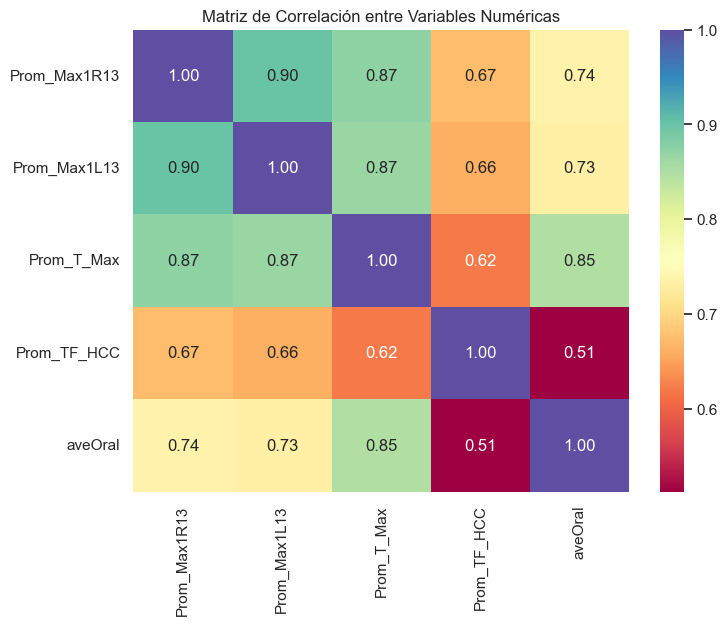

In [10]:
matriz_corr = df_promedio.corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(matriz_corr)

# Visualizar con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

**Analisis:**
1. Relaciones fuertes:
Las zonas Max1R13 y Max1L13 están muy fuertemente correlacionadas (0.79),indicando que las mediciones en ambas zonas muetran un posible comportamiento similar respecto a las diferencias de temperatura con la temperatura oral.
Max1R13 y T_Max también muestran una relación fuerte (0.70), lo que sugiere que las mediciones de estas zonas tienden a variar de manera similar.

2. Relación más débil:
La correlación más débil se da entre T_Max y TF_HCC (0.45). Esto muetra que estas dos zonas tienen diferencias de temperatura menos relacionadas entre sí, entonces, podrían comportarse de manera más independiente en términos de las variaciones de temperatura con respecto a la oral.

Teniendo en cuenta la equivalencia de la técnica de medición con el termógrafo, es posible que las zonas más correlacionadas (como Max1R13 y Max1L13) muetren una mayor confiabilidad en la comparación con la temperatura oral.

## Parte 2 

#### Prueba de hipotesis 
**En caso de cumplir el supuesto de normalidad**
Según el experimento planteado lo más apropiado es realizar una prueba t para muestras pareadas la cual se utiliza cuando se tiene dos conjuntos de mediciones que provienen del mismo grupo de sujetos. En este caso se compara las diferencias de temperatura entre la temperatura oral y las mediciones en las diferentes zonas del cuerpo.
Esta prueba de hipotesis permite verificar si la media de las diferencias entre las temperaturas son estadísticamente diferentes de cero, lo que indicaría una diferencia significativa.

Supuestos de la prueba t para muestras pareadas:
1.	Hipótesis nula (H0): No hay diferencia significativa entre las diferencias de temperatura y la temperatura oral.
2.	Hipótesis alternativa (H1): Hay una diferencia significativa entre las diferencias de temperatura y la temperatura oral.


En la prueba se deben cumplir supuestos de normalidad 

**En caso de no cumplir la prueba de normalidad**
En este contexto, si los datos no cumplen con los supuestos de normalidad requeridos por las pruebas paramétricas, se recurre a una prueba no paramétrica como la de los rangos con signo de Wilcoxon. Esta prueba permite evaluar si las diferencias entre las mediciones de cada técnica en el mismo individuo tienden a centrarse alrededor de cero. En consecuencia, se plantean como hipótesis:
1. Hipótesis nula (H0): mediana de las diferencias entre ambas técnicas es igual a cero, lo que indicaría que no existe una diferencia sistemática entre ellas y, por tanto, podrían considerarse equivalentes. 
2. Hipótesis alternativa (H1): sostiene que la mediana de las diferencias es distinta de cero, lo que indicaría que las técnicas no son equivalentes. Esta prueba resulta adecuada para valorar la equivalencia en presencia de datos apareados y no normalmente distribuidos.


##### Supuesto de normalidad 
Dado que hay mas de 50 datos (n<50), se usa la prueba de normalidad de Kolmogorov-Smirnof y se realiza sobre la diferencia de temperatura aveOralM y el resto de las temperaturas 

In [9]:
# Pruebas de normalidad
def test_normalityKS(data, variable): # Pruaba de Normalidad Kolmogorov-Smirnof 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """  
    print(f"\n Análisis de normalidad por Kolmogorov-Smirnov para '{variable}'")

    # Kolmogorov-Smirnov (KS) test
    ks_stat, ks_p = stats.kstest(data, 'norm', args=(np.mean(data), np.std(data)))
    print(f" Estadístico = {ks_stat:.4f}, p-valor = {ks_p:.4f}")


# Para diferencia entre el temperatura promedio Max1R13  y temperatura aveOral
test_normalityKS(diff_Max1R13," Analisis dediferencia entre promedio Max1R13  y temperatura aveOral ")
test_normalityKS(diff_Max1L13," Analisis de diferencia entre promedio Max1L13  y temperatura aveOral ")
test_normalityKS(diff_T_Max,"Analisis de diferencia entre promedio T_Max y temperatura aveOral ")
test_normalityKS(diff_TF_HCC,"Analisis de diferencia entre promedio TF_HCC y temperatura aveOral")


 Análisis de normalidad por Kolmogorov-Smirnov para ' Analisis dediferencia entre promedio Max1R13  y temperatura aveOral '
 Estadístico = 0.0298, p-valor = 0.3196

 Análisis de normalidad por Kolmogorov-Smirnov para ' Analisis de diferencia entre promedio Max1L13  y temperatura aveOral '
 Estadístico = 0.0312, p-valor = 0.2671

 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia entre promedio T_Max y temperatura aveOral '
 Estadístico = 0.0286, p-valor = 0.3668

 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia entre promedio TF_HCC y temperatura aveOral'
 Estadístico = 0.0664, p-valor = 0.0002


De acuerdo las hipotesis 
1. Si el p-valor > 0.05, no se rechaza H₀: se concluye que la muestra podría provenir de una distribución normal.

2. Si el p-valor ≤ 0.05, se rechaza H₀: se concluye que la muestra no sigue una distribución normal.

Respuesta: Las temperaturas Max1R13, Max1L13, T_Max tienen una distribución normal dado que el valor de p es mayor a 0.05, en cambio la diferencia relacionada con TF_HCC no tiene distribución normal ya que el valor p es mucho menor que 0.05, por esto es necesario realizar una transformacion para la diferencia asociada a TF_HCC

In [10]:
#Funciones y aplicacion para trasnformacion de datos 
def transform_log(data):
    """
    Realiza una transformación logarítmica en los datos proporcionados.
    Asegúrate de que los datos sean estrictamente positivos para que esta transformación funcione.
    
    Argumentos:
    data -- Array o lista de datos a transformar (debe ser positivo).
    
    Retorna:
    transformed_data -- Datos transformados con el logaritmo natural.
    """
    # Asegúrate de que los datos son mayores que cero para aplicar la transformación logarítmica.
    if np.any(data <= 0):
        raise ValueError("Todos los valores deben ser mayores que 0 para aplicar la transformación logarítmica.")
    
    transformed_data = np.log(data)  # Logaritmo natural (base e)
    return transformed_data

diff_TF_HCClog=transform_log(diff_TF_HCC)
test_normalityKS(diff_TF_HCC,"Analisis de diferencia trasnformada box-cox entre promedio TF_HCC y temperatura aveOral")


from scipy.stats import boxcox
#Transformacion box cox 
def aplicar_boxcox(data):
    """
    Aplica la transformación Box-Cox a un conjunto de datos.
    """
    # Comprobar que los datos sean positivos
    if np.any(data <= 0):
        raise ValueError("Los datos deben ser positivos para aplicar la transformación Box-Cox.")
    
    # Aplicar la transformación Box-Cox
    transformed_data, best_lambda = boxcox(data)
    
    return transformed_data, best_lambda

diff_TF_HCCtr,i=aplicar_boxcox(diff_TF_HCC)
test_normalityKS(diff_TF_HCC,"Analisis de diferencia trasnformada box-cox entre promedio TF_HCC y temperatura aveOral")

from scipy.stats import yeojohnson
def transform_yeojohnson(data):
    """
    Realiza la transformación de Yeo-Johnson en los datos proporcionados.
    
    Argumentos:
    data -- Array o lista de datos a transformar
    
    Retorna:
    transformed_data -- Datos transformados con la transformación Yeo-Johnson
    lambda_ -- El valor de lambda usado para la transformación
    """
    transformed_data, lambda_ = yeojohnson(data)
    return transformed_data, lambda_

diff_TF_HCCyeo,r=transform_yeojohnson(diff_TF_HCC)
test_normalityKS(diff_TF_HCC,"Analisis de diferencia trasnformada Yeo-Jhonson  entre promedio TF_HCC y temperatura aveOral")


 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia trasnformada box-cox entre promedio TF_HCC y temperatura aveOral'
 Estadístico = 0.0664, p-valor = 0.0002

 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia trasnformada box-cox entre promedio TF_HCC y temperatura aveOral'
 Estadístico = 0.0664, p-valor = 0.0002

 Análisis de normalidad por Kolmogorov-Smirnov para 'Analisis de diferencia trasnformada Yeo-Jhonson  entre promedio TF_HCC y temperatura aveOral'
 Estadístico = 0.0664, p-valor = 0.0002


**Analisis de transformación**
Dado que en diversas transfromaciones el p-valor es igual a 0.0002, lo cual es mucho menor que 0.05, rechazamos la hipótesis nula mostrando que los datos no siguen una distribución normal. Esto significa que la transformación  de TF_HCC con respecto a la temperatura oral no ha logrado normalizar completamente los datos através de las transformaciones aplicadas. 

In [11]:
#Prueba t  para temperaturas que cumplen el suspuesto de normalidad 
def prueba_t_pareada(muestra1, muestra2, alpha=0.05):
    """
    Realiza una prueba t para muestras pareadas (dependientes).
    
    Parámetros:
        muestra1 (array-like): Primer conjunto de datos (antes, condición A, etc.)
        muestra2 (array-like): Segundo conjunto de datos (después, condición B, etc.)
        alpha (float): Nivel de significancia (por defecto 0.05)
        
    Retorna:
        t_stat (float): Estadístico t
        p_val (float): Valor p
        resultado (str): Interpretación de la prueba
    """
    t_stat, p_val = ttest_rel(muestra1, muestra2)
    
    if p_val < alpha:
        resultado = f"Se rechaza H0 (p = {p_val:.4f} < {alpha}):hay diferencia significativa entre las muestras."
    else:
        resultado = f"No se rechaza H0 (p = {p_val:.4f} ≥ {alpha}):no hay diferencia significativa entre las muestras."
    
    return t_stat, p_val, resultado

t_stat_Max1L13, p_value_Max1L13,r_1 = prueba_t_pareada(list_1,columna1)
t_stat_Max1R13, p_value_Max1R13,r_2= prueba_t_pareada(list_1,columna2)
t_stat_T_Max, p_value_T_Max,r_3 = prueba_t_pareada(list_1,columna3)


# Resultado para cada una de las diferencias
print("Verificación de prueba t usando los valores recopilados del dataFrame original de temperaturas:\n ")
print(f"Max1L13 \n t-stat: {t_stat_Max1L13}, p-value: {p_value_Max1L13}\n resultado: {r_1}\n")
print(f"Max1R13 \n t-stat: {t_stat_Max1R13}, p-value: {p_value_Max1R13}\n resultado: {r_2}\n")
print(f"T_Max \n t-stat: {t_stat_T_Max}, p-value: {p_value_T_Max}\n resultado: {r_3}\n")




Verificación de prueba t usando los valores recopilados del dataFrame original de temperaturas:
 
Max1L13 
 t-stat: 116.27040125117469, p-value: 0.0
 resultado: Se rechaza H0 (p = 0.0000 < 0.05):hay diferencia significativa entre las muestras.

Max1R13 
 t-stat: 117.21449036439094, p-value: 0.0
 resultado: Se rechaza H0 (p = 0.0000 < 0.05):hay diferencia significativa entre las muestras.

T_Max 
 t-stat: 109.38880602702406, p-value: 0.0
 resultado: Se rechaza H0 (p = 0.0000 < 0.05):hay diferencia significativa entre las muestras.



In [14]:
#Prueba t para muestras pareadas usando la diferencias de las temperaturas 
def prueba_t_pareadas_diferencias(diferencias):
    """
    Realiza una prueba t para muestras pareadas para determinar si la media de las diferencias
    es significativamente diferente de 0. Se usa cuando se tienen diferencias ya calculadas
    entre dos mediciones (por ejemplo, temperatura oral y las otras mediciones).
    
    Argumento:
    diferencias -- Serie o arreglo con las diferencias entre las mediciones y la temperatura oral.
    
    Retorna:
    tuple: Valor t, p-value
    """
    # Se asume que las diferencias son una muestra de la población
    t_stat, p_value = stats.ttest_1samp(diferencias, 0)  # La hipótesis nula es que la media de las diferencias es 0
    return t_stat, p_value

t_stat_Max1L13, p_value_Max1L13 = prueba_t_pareadas_diferencias(diff_Max1L13)
t_stat_Max1R13, p_value_Max1R13 = prueba_t_pareadas_diferencias(diff_Max1R13)
t_stat_T_Max, p_value_T_Max = prueba_t_pareadas_diferencias(diff_T_Max)
t_stat_TF_HCC, p_value_TF_HCC = prueba_t_pareadas_diferencias(diff_TF_HCCtr)

# Ahora puedes revisar los resultados con más decimales
print("\nVerificación de prueba t usando diferencia de temperaturas:\n ")
print(f"Max1L13\nt-stat: {t_stat_Max1L13:.6f}, p-value: {p_value_Max1L13:.6f}")
print(f"Max1R13 \n t-stat: {t_stat_Max1R13:.6f}, p-value: {p_value_Max1R13:.6f}")
print(f"T_Max \n t-stat: {t_stat_T_Max:.6f}, p-value: {p_value_T_Max:.6f}")


Verificación de prueba t usando diferencia de temperaturas:
 
Max1L13
t-stat: 116.952544, p-value: 0.000000
Max1R13 
 t-stat: 115.976657, p-value: 0.000000
T_Max 
 t-stat: 109.560630, p-value: 0.000000


In [ ]:
from scipy.stats import wilcoxon
def prueba_wilcoxon(muestra1, muestra2):
    """
    Realiza la prueba de Wilcoxon para muestras pareadas (no paramétrica).
    
    Argumentos:
    muestra1 -- Primer conjunto de datos (por ejemplo, temperatura oral).
    muestra2 -- Segundo conjunto de datos (por ejemplo, TF_HCC).
    
    Retorna:
    statistic -- Estadístico de la prueba
    p_value -- Valor p de la prueba
    """
    statistic, p_value = wilcoxon(muestra1, muestra2)
    return statistic, p_value

t_stat_TF_HCC, p_value_TF_HCC=prueba_wilcoxon(list_1,columna4)
print(f"TF_HCC\n t-stat: {t_stat_TF_HCC:.6f}, p-value: {p_value_TF_HCC:.6f}")

TF_HCC
 t-stat: 0.000000, p-value: 0.000000


## Parte 2

### Primer punto: Análisis exploratorio de datos 

In [ ]:
#Análisis exploratorio de datos

#Carga del archivo a dataframe
datos_cel= pd.read_excel("A375.xlsx") #Leer el excel 
print(tabulate(datos_cel, headers='keys', tablefmt='github', showindex=True))


|    |   Bloque2 |   Estimulo2 |   Tiempo2 |   Viabilidad2 |
|----|-----------|-------------|-----------|---------------|
|  0 |         3 |           1 |         7 |       59.7516 |
|  1 |         3 |           1 |         1 |       75.0419 |
|  2 |         3 |           2 |         1 |       75.3769 |
|  3 |         3 |           1 |         7 |       80.1719 |
|  4 |         3 |           1 |         7 |       80.1719 |
|  5 |         3 |           2 |         7 |       82.6087 |
|  6 |         3 |           2 |         1 |       88.9213 |
|  7 |         3 |           2 |         7 |       89.2572 |
|  8 |         3 |           2 |         7 |       89.2572 |
|  9 |         3 |           1 |         1 |       91.4894 |
| 10 |         3 |           2 |         1 |      100.685  |
| 11 |         3 |           1 |         1 |      100.685  |
| 12 |         3 |           1 |         1 |      106.706  |
| 13 |         3 |           2 |         1 |      128.085  |
| 14 |         4 |      

In [ ]:
#Construcción de un DataFrame de los estadisticos de las varibles 

#Tipos de datos: Variables numéricas y Variables categóricas

def valores_estadisticos(valores):  #Función para el cálculo de metricas estadisticas

    """
    Función: Calcula varias medidas estadísticas descriptivas a partir de una lista o array de valores.
    Parámetros:
    valores (list): Conjunto de datos numéricos o categóricos.

    Retorna:
    list: Una lista con las medidas estadísticas solicitadas en orden:
    Notas:
    - Si los datos no son numéricos, se intentará obtener únicamente la moda.
    - En caso de que no exista una moda única, se devuelve el string 'No única'.
    """
    # Convertir a numpy array por seguridad
    valores = np.array(valores)

    # Si no son numéricos (excepto moda), devolver NaN
    if not np.issubdtype(valores.dtype, np.number):
        media = mediana = sd = mad = varianza = iqr = cv = cvm = np.nan
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
    else:
        media = np.mean(valores)
        mediana = np.median(valores)
        try:
            moda = statistics.mode(valores)
        except statistics.StatisticsError:
            moda = 'No única'
        sd = np.std(valores, ddof=1)
        mad = np.mean(np.abs(valores - np.mean(valores)))
        varianza = np.var(valores, ddof=1)
        iqr = np.percentile(valores, 75) - np.percentile(valores, 25)
        cv = sd / media if media != 0 else np.nan
        cvm = mad / media if media != 0 else np.nan

    return [media, mediana, moda, sd, mad, varianza, iqr, cv, cvm]

# Calculamos los valores estadísticos por variable
estadisticas = {nombre: valores_estadisticos(lista) for nombre, lista in datos_cel.items()}

# Convertimos a DataFrame con los nombres de filas
estadisticas_df = pd.DataFrame(estadisticas, index=["Media", "Mediana", "Moda", "SD", "MAD", "Varianza", "IQR", "CV", "CVM"])

# Mostramos el resultado
print(tabulate(estadisticas_df, headers='keys', tablefmt='github', showindex=True))

|          |   Bloque2 |   Estimulo2 |   Tiempo2 |   Viabilidad2 |
|----------|-----------|-------------|-----------|---------------|
| Media    |  3.41667  |    1.5      |  3.5      |    101.884    |
| Mediana  |  3        |    1.5      |  1        |     98.6111   |
| Moda     |  3        |    1        |  1        |     80.1719   |
| SD       |  0.50361  |    0.510754 |  3.02166  |     23.5526   |
| MAD      |  0.486111 |    0.5      |  2.91667  |     18.8448   |
| Varianza |  0.253623 |    0.26087  |  9.13043  |    554.724    |
| IQR      |  1        |    1        |  6        |     31.3869   |
| CV       |  0.147398 |    0.340503 |  0.863332 |      0.23117  |
| CVM      |  0.142276 |    0.333333 |  0.833333 |      0.184963 |


### Análisis de  la variable viabilidad celular
Como en el experimento se analiza el comportamiento de la viabilidad celular sobre los recubrimientos y el tiempo de exposición, nos centraremos en analizar únicamente esta variable respuesta.

Luego de hacer el análisis exploratorio de datos y verificar las métricas estadísticas del experimento, se concluye que el SD es mayor que el MAD y su distancia se considera significativamente grande; por lo que se puede deducir que hay presencia de valores atípicos.


### Verificación de datos atípicos 


 ANÁLISIS DE OUTLIERS: VIABILIDAD2
• Valores totales: 24 | Válidos: 24
• Número de outliers: 0


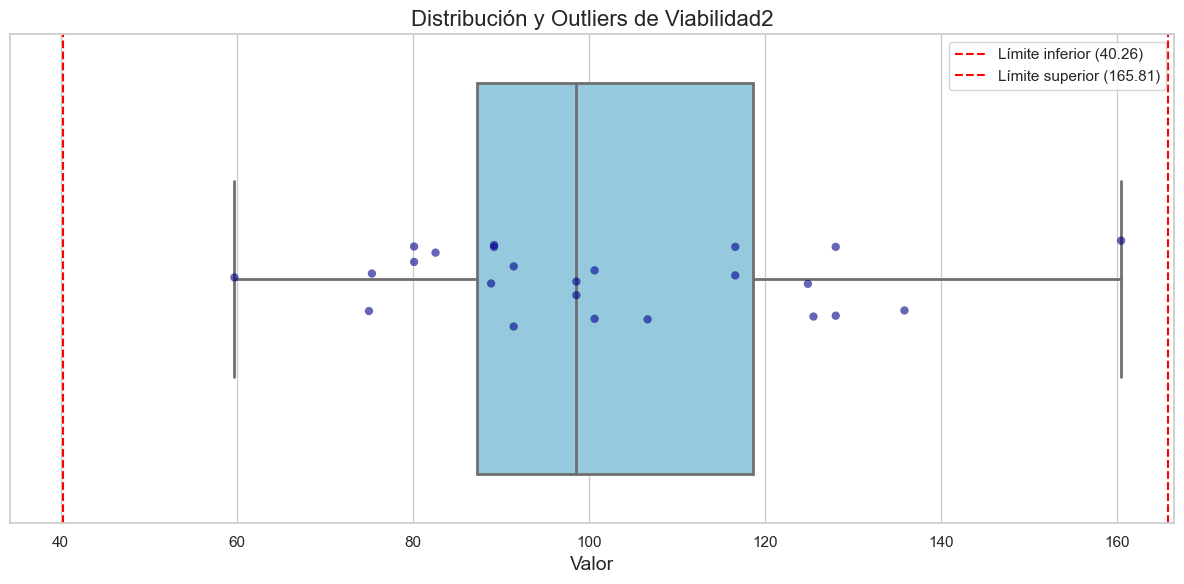

In [ ]:
def analizar_outliers_con_grafico(serie, nombre):
    datos = np.array(serie)
    datos_validos = datos[~np.isnan(datos)]

    if len(datos_validos) == 0:
        print(f"\n{nombre}: Todos los valores son NaN")
        return

    # Cálculo de outliers
    Q1, Q3 = np.percentile(datos_validos, [25, 75])
    IQR = Q3 - Q1
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR
    outliers = datos_validos[(datos_validos < lim_inf) | (datos_validos > lim_sup)]
    n_outliers = len(outliers)

    # Resultados
    print(f"\n{'='*60}")
    print(f" ANÁLISIS DE OUTLIERS: {nombre.upper()}")
    print(f"• Valores totales: {len(serie)} | Válidos: {len(datos_validos)}")
    print(f"• Número de outliers: {n_outliers}")

    if n_outliers > 0:
        indices_outliers = np.where((datos < lim_inf) | (datos > lim_sup))[0]
        df_outliers = pd.DataFrame({
            'Índice': indices_outliers,
            'Valor': datos[indices_outliers]
        })
        print("\nOutliers detectados:")
        print(tabulate(df_outliers, headers='keys', tablefmt='github', showindex=False))

    # Gráfico mejorado
    plt.figure(figsize=(12, 6))
    sns.set(style="whitegrid")

    # Boxplot con seaborn
    ax = sns.boxplot(x=datos_validos, color='skyblue', fliersize=8, linewidth=2)

    sns.stripplot(x=datos_validos, color='darkblue', size=6, jitter=True, alpha=0.6)

    # Líneas para límites de outliers
    plt.axvline(lim_inf, color='red', linestyle='--', label=f'Límite inferior ({lim_inf:.2f})')
    plt.axvline(lim_sup, color='red', linestyle='--', label=f'Límite superior ({lim_sup:.2f})')

    plt.title(f'Distribución y Outliers de {nombre}', fontsize=16)
    plt.xlabel('Valor', fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()


analizar_outliers_con_grafico(datos_cel['Viabilidad2'], 'Viabilidad2')

#### Análisis de datos atipicos

* Los datos están ligeramente sesgados hacia la izquierda (asimetría negativa), ya que la mediana está más cerca de Q1 que de Q3.

* No se observan outliers en la viabilidad, lo cual es positivo para los supuestos del ANOVA.

* Existe una alta variabilidad en la viabilidad celular entre condiciones experimentales, lo cual podría deberse a los efectos de los tratamientos aplicados.
La distribución no es perfectamente simétrica, por lo que sería útil corroborar la normalidad de los residuos al aplicar ANOVA.

#### Histograma de  datos para viabilidad celular

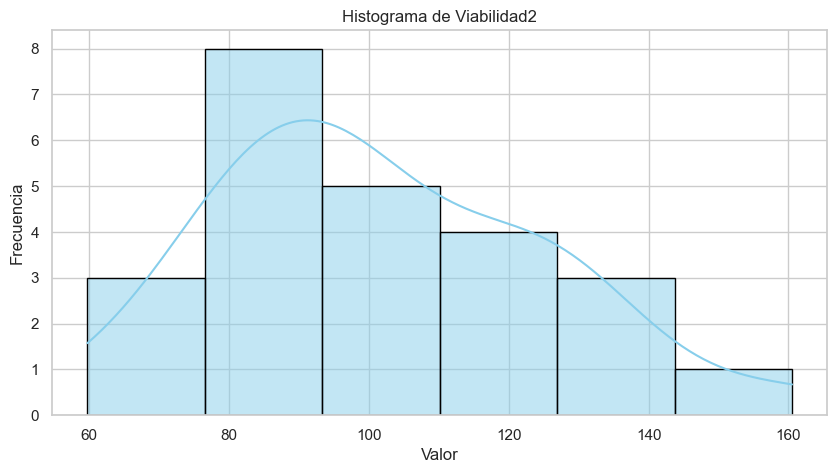

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def graficar_histograma(data, columna, bins=10, color='skyblue'):
    """
    Grafica el histograma de una columna específica de un DataFrame.

    Parámetros:
    - data: DataFrame de pandas que contiene la columna.
    - columna: nombre de la columna a graficar.
    - bins: número de divisiones del histograma (default 10).
    - color: color de las barras del histograma.
    """
    plt.figure(figsize=(10, 5))
    sns.histplot(data[columna], bins='auto', kde=True, color=color, edgecolor='black') #ponemos el número de bins en auto porque puede afectar la forma visual del historgrama, confundiendo el análisis pertinnete de la gráfica
    plt.title(f'Histograma de {columna}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

graficar_histograma(datos_cel,'Viabilidad2')

### Análisis de histograma
**Viabilidad:** El histograma muestra un comportamiento de agrupación de datos hacia la derecha, lo cual puede contradecir un poco lo observado en la gráfica anterior. Sin embargo, para proceder a realizar la prueba ANOVA, vamos a comprobar cada uno de los puestos, allí veremos el comportamiento de la normalidad de lis datos para confirmar lo que se muestra en las gráficas.

### Test de Normalidad

In [ ]:
#Como estábamos analizando el comportamiento gráfico de los datos, vamos a realizar primero el supuesto de normalidad. Como los datos con menores a 50 (n<50), entonces realizamos la prueba de Shapiro

def test_normalitySW(data, variable): # Prueba de Normalizas Shapiro-Wilks 
    """
    data: arreglo de datos a evaluar la normalidad
    variable: string con el nombre de la variable 
    """
    print(f"\n Análisis de normalidad por Shapiro-Wilk para '{variable}'")
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    print(f"Estadístico = {shapiro_stat:.4f}, p-valor = {shapiro_p:.4f}")

test_normalitySW(datos_cel['Viabilidad2'],'Viabilidad2')


 Análisis de normalidad por Shapiro-Wilk para 'Viabilidad2'
Estadístico = 0.9614, p-valor = 0.4675


**Análisis de normalidad:** Como el valor de p es mayor a alfa (0.05), entonces los datos de la variable respuesta (viabilidad celular) tienen una distribución normal y se cumple uno de los supuestos del ANOVA.

### Evaluación de homocedasticidad

In [ ]:
#Ahora vamos a analizar si presenta homocedasticidad entre los datos: varianza entre estímulo y tiempo de interacción con la variable de viabilidad

def test_homogeneityL(var1, var2, name1, name2): # Prueba de levene
    """
    var1 y var2: variables a las que se corroborará homocedasticidad 
    name1 y name2: strings con el nnombre de las variables
    """
    print(f"\n Análisis de homocedasticidad entre '{name1}' y '{name2}'")

    # Prueba de Levene (no asume normalidad)
    levene_stat, levene_p = stats.levene(var1, var2)
    print(f"Levene test: Estadístico = {levene_stat:.4f}, p-valor = {levene_p:.4f}")

#Comprobamos homocedasticidad entre Viabilidad2 y Estímulo2: como en el experimento se utiliza un estímulo 1 y 2, se analiza cada uno de estos estímulos con la variable de viabilidad
grupo1 = datos_cel[datos_cel['Estimulo2'] == 1]['Viabilidad2'] #Para analizar el estímulo 1
grupo2 = datos_cel[datos_cel['Estimulo2'] == 2]['Viabilidad2'] #Para analizar el estímulo 2

test_homogeneityL(grupo1, grupo2, "Viabilidad2", "Estimulo2")

#Comprobamos homocedasticidad entre Viabilidad2 y Tiempo de exposición: en este caso, el tiempo de exposición es de 1 o 7 días, por lo que se analiza igualando al número de días que se va a estudiar el comportamiento
grupo3 = datos_cel[datos_cel['Tiempo2'] == 1]['Viabilidad2'] #Para analizar el tiempo de exposición día 1
grupo4 = datos_cel[datos_cel['Tiempo2'] == 7]['Viabilidad2'] #Para analizar el tiempo de exposición día 7


test_homogeneityL(grupo3, grupo4, "Viabilidad2", "Tiempo2")


 Análisis de homocedasticidad entre 'Viabilidad2' y 'Estimulo2'
Levene test: Estadístico = 0.9354, p-valor = 0.3440

 Análisis de homocedasticidad entre 'Viabilidad2' y 'Tiempo2'
Levene test: Estadístico = 1.9619, p-valor = 0.1753


Como los valores de p el análisis de homocedasticidad entre Viabilidad vs. Tiempo y Viabilidad vs. Estímulo son mayores a alfa (0.05), entonces se concluye que los datos son homocedásticos. De esta manera, se cumple con otro de los supuestos del ANOVA

## Evaluación de interacciones

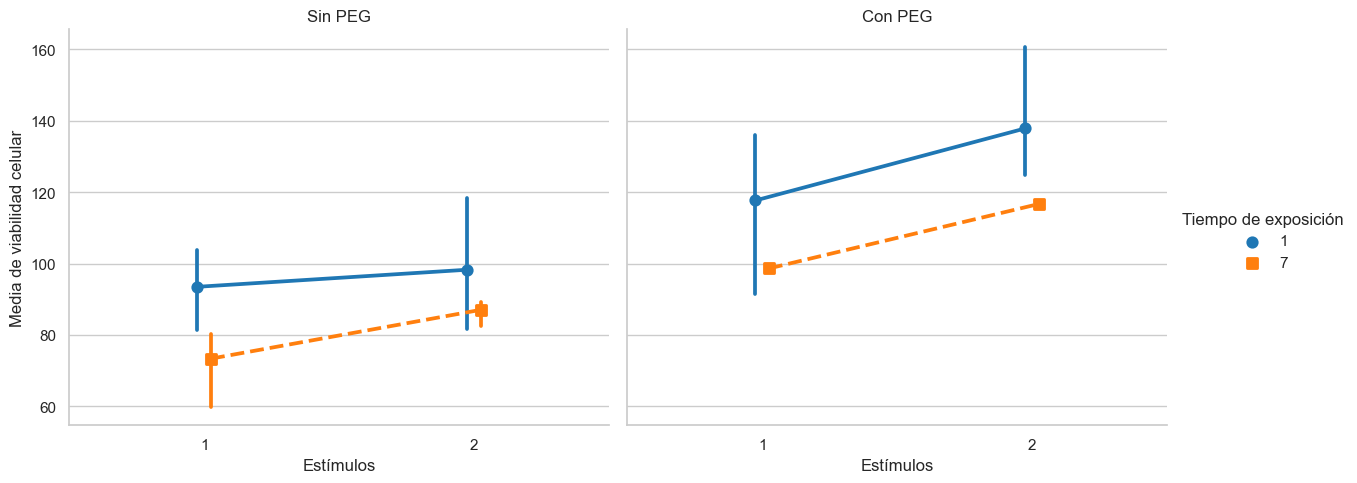

In [ ]:
# Crear columna categórica con etiquetas más descriptivas
datos_cel['Recubrimiento_label'] = datos_cel['Bloque2'].map({3: 'Sin PEG', 4: 'Con PEG'})

# Asegurar orden de categorías (opcional)
estimulos_order = sorted(datos_cel['Estimulo2'].unique())
tiempos_order = sorted(datos_cel['Tiempo2'].unique())

# Crear FacetGrid usando etiquetas de recubrimiento
g = sns.FacetGrid(datos_cel, col="Recubrimiento_label", height=5, aspect=1.2)

# Usar map_dataframe con sns.pointplot
g.map_dataframe(
    sns.pointplot,
    x="Estimulo2", y="Viabilidad2", hue="Tiempo2",
    dodge=True, markers=["o", "s"], linestyles=["-", "--"],
    palette="tab10", ci=95,
    order=estimulos_order,
    hue_order=tiempos_order
)

# Ajustar etiquetas y leyenda
g.set_axis_labels("Estímulos", "Media de viabilidad celular")
g.set_titles("{col_name}")  # Ahora mostrará "Sin PEG" y "Con PEG"
g.add_legend(title="Tiempo de exposición")
plt.show()



**Análisis del gráfico de interacción:** El efecto del estímulo sobre la viabilidad depende del tiempo de exposición.
Para un día, el cambio en viabilidad es menor entre estímulos; para siete días, el cambio es más notable. Esto se puede notar en las pendientes de las recta, para la recta azul (tiempo 1) la pendiente no es tan pronunciada como para la recta naranja (tiempo 7), la cual posee mayor cantidad de estímulos. Por otro lados, las pendientes son más pronunciadas con el recubrimiento, que sin el recubrimiento, lo que indica que el recubrimiento potencia el efecto del estímulo.

Matriz de correlación:
                   Estimulo        Tiempo  Viabilidad  Recubrimiento
Estimulo       1.000000e+00  3.127699e-17    0.283464   3.753239e-17
Tiempo         3.127699e-17  1.000000e+00   -0.392474  -2.857143e-02
Viabilidad     2.834636e-01 -3.924738e-01    1.000000   6.531076e-01
Recubrimiento  3.753239e-17 -2.857143e-02    0.653108   1.000000e+00


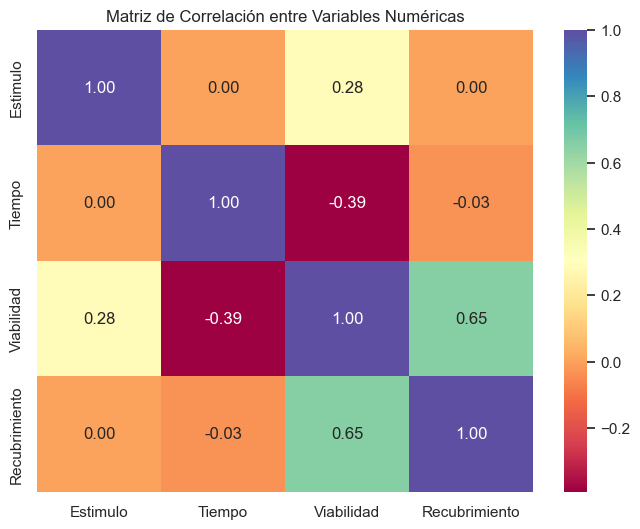

In [ ]:
#Realizamos una matriz de correlación para estudiar mejor la relación entre las diferentes variables

variables={
    "Estimulo":datos_cel['Estimulo2'],
    "Tiempo":datos_cel['Tiempo2'],
    "Viabilidad":datos_cel['Viabilidad2'],
    "Recubrimiento": datos_cel['Bloque2']

}
data_variables=pd.DataFrame(variables)

# Calcular matriz de correlación
matriz_corr = data_variables.corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(matriz_corr)

# Visualizar con mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_corr, annot=True, cmap='Spectral', fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

- La Viabilidad es la variable que muestra una mayor correlación con otras variables, especialmente con el Recubrimiento (0.65), indicando que una puede depender de la otra.

- Las relaciones entre Estímulo, Tiempo, Viabilidad y Recubrimiento no son muy fuertes, excepto en el caso de la viabilidad con recubrimiento, donde hay una correlación moderada.

- No se observan correlaciones fuertes entre Estímulo y las otras variables, lo que sugiere que el estímulo no tiene una relación directa o clara con tiempo, viabilidad o recubrimiento.

## Análisis de Varianza (ANOVA)
Luego de comprobar algunos de los supuestos como la normalidad, la homocedasticidad y las interacciones entre variables, realizamos el análisis de varianza

In [ ]:
#Como vamos a evaluar cada una de las interacciones, vamos a añadir una nueva variable que es la de recubrimiento, que indique cual tiene recubrimiento de PEG y cuál no

datos_cel['Recubrimiento'] = datos_cel['Bloque2'].map({3: 0, 4: 1})  # 0 = sin PEG, 1 = con PEG

#Evaluamos la interacción que tienen los tres factores con la viabilidad celular
modelo = ols('Viabilidad2 ~ C(Recubrimiento)*C(Estimulo2)*C(Tiempo2)', data=datos_cel).fit()

#Evaluación de la influencia del recubrimiento, los estímulos y el tiempo en el experimento
modelo = ols('Viabilidad2 ~ C(Estimulo2)+C(Tiempo2)', data=datos_cel).fit()

#Evaluación de la influencia de todos los efectos posibles 
modelo = ols('Viabilidad2 ~ C(Recubrimiento) + C(Tiempo2) + C(Estimulo2) + \
            C(Recubrimiento):C(Tiempo2) + \
            C(Recubrimiento):C(Estimulo2) + \
            C(Tiempo2):C(Estimulo2) + \
            C(Recubrimiento):C(Tiempo2):C(Estimulo2)', data=datos_cel).fit()


anova_table = sm.stats.anova_lm(modelo, typ=3)


# Mostrar resultados
print(tabulate(anova_table,headers='keys',tablefmt='heavy_grid'))

                                                sum_sq    df            F        PR(>F)
----------------------------------------  ------------  ----  -----------  ------------
Intercept                                 34954.4          1  131.887        3.8779e-09
C(Recubrimiento)                           1001.32         1    3.7781       0.0697302
C(Tiempo2)                                  693.645        1    2.61721      0.125252
C(Estimulo2)                                 45.8235       1    0.172898     0.683073
C(Recubrimiento):C(Tiempo2)                   0.819985     1    0.0030939    0.956331
C(Recubrimiento):C(Estimulo2)               203.388        1    0.767408     0.393982
C(Tiempo2):C(Estimulo2)                      67.7313       1    0.255558     0.620081
C(Recubrimiento):C(Tiempo2):C(Estimulo2)     42.8961       1    0.161852     0.69278
Residual                                   4240.52        16  nan          nan


**Análisis de la prueba de ANOVA:** 
A partir del análisis de varianza de tres factores, no se encontraron efectos estadísticos significativos, ya que la mayoría de valores p son mayores a alfa (p>0.05), por lo que se acepta H0 que enuncia que el efecto no es significativo. Asimismo, podemos decir que los efectos principales en sus interacciones (recubrimiento, tiempo y estímulo) no presentan una importancia grande en el experimento. Por otro lado, el recubrimiento a pesar de tener un valor bajo y que sigue la hipótesis H0, se aleja muy poco del valor de alfa, por lo que puede representar una leve influencia en la viabilidad celular.

In [ ]:
#ELIMINAMOS EFECTOS NO SIGNIFICATIVOS

# Ajustar el modelo con los efectos significativos (recubrimiento y intercepto)
modelo_simplificado = ols('Viabilidad2 ~ C(Recubrimiento)', data=datos_cel).fit()

# Evaluar el modelo simplificado con ANOVA
anova_table_simplificado = sm.stats.anova_lm(modelo_simplificado, typ=3)

# Mostrar los resultados del modelo simplificado
print(tabulate(anova_table_simplificado, headers='keys', tablefmt='heavy_grid'))


                     sum_sq    df         F         PR(>F)
----------------  ---------  ----  --------  -------------
Intercept         111287        1  334.632     8.52437e-15
C(Recubrimiento)    5442.2      1   16.3643    0.000540103
Residual            7316.46    22  nan       nan


Eliminando los efectos no significativos del ANOVA, podemos concluir que en efecto, el recubrimiento es un efecto significativo para la viabilidad celular. Esto lo vemos en el valor p que es mucho menor que alfa.

## Extracción de residuos

Shapiro-Wilk Test: Estadístico = 0.9782, p-valor = 0.8600
t-test de media cero: p-valor = 1.0000
Prueba de Runs (independencia): p-valor = 0.8609


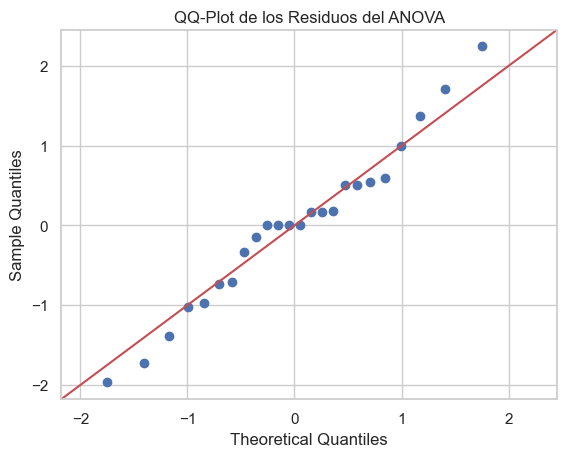

In [ ]:

from statsmodels.graphics.gofplots import qqplot #Gráficos para normalidad: QQ diferencia en distribución 
from scipy.stats import ttest_1samp #PRUEBA DE LA MEDIA CERO PARA LOS RESIDUOS 
from statsmodels.sandbox.stats.runs import runstest_1samp #EVALUACIÓN DE INDEPENDENCIA DE LOS RESIDUOS 
from scipy.stats import shapiro #EVALUACIÓN DE NORMALIDAD DE LOS RESIDUOS EN LOS DATOS, COMO LOS DATOS SON MENOS A 50, USAMOS SHAPIRO

# Extraer residuos del modelo
datos_cel['Residuos'] = modelo.resid

# Realizar la prueba de Shapiro-Wilk
stat_shapiro, p_shapiro = shapiro(datos_cel['Residuos'])
# Imprimir el resultado
print(f"Shapiro-Wilk Test: Estadístico = {stat_shapiro:.4f}, p-valor = {p_shapiro:.4f}")

# 3. Prueba de media cero (t-test)
t_stat, p_t = ttest_1samp(datos_cel['Residuos'], 0)
print(f"t-test de media cero: p-valor = {p_t:.4f}")

# 4. Prueba de independencia (Runs test)
_, p_runs = runstest_1samp(datos_cel['Residuos'], correction=True)
print(f"Prueba de Runs (independencia): p-valor = {p_runs:.4f}")

# Eliminar los valores NaN e infinitos
datos_cel_clean = datos_cel[datos_cel['Residuos'].notna() & (datos_cel['Residuos'] != float('inf')) & (datos_cel['Residuos'] != -float('inf'))]

# Graficar solo después de limpiar los datos
sm.qqplot(datos_cel_clean['Residuos'], line='45', fit=True)
plt.title("QQ-Plot de los Residuos del ANOVA")
plt.show()



**Análisis de los residuos**: Al realizar la extracción de residuos del experimento y completar las pruebas pertinentes para ellos, se puede concluir que:

- La prueba de normalidad realizada para los residuos, muestra que en efecto, siguen una distribución normal ya que el valor de p es mayor a alfa (0.05). Además, en la gráfica de estos residuos se puede ver que todos siguen una tendencia normal.

- La media de los residuos es cero, ya que el valor de p=1 es mayor a alfa, esto sugiere además que el modelo no presenta un sesgo ya que la media está cercana a cero.

- La prueba de runs, muestra que los residuos son independientes debido a un valor p alto.

**Conclusión:** Se han comprobado todos los supuestos del ANOVA, por lo que la prueba tiene validez y se puede decir que, el recubrimiento podría ser el factor que más influye en la viabilidad celular, aunque no es completamente significativo en el análisis. Los otros factores (tiempo y estímulo) y sus interacciones no parecen tener un impacto importante.

## ¿Se debe realizar una prueba Tukey?

Con base a los resultados del ANOVA y analizando las interacciones que hay entre los factores presentes en el de experimento para el estudio de la viabilidad celular, no es necesario realizar una prueba Tukey ya que no hay múltiples factores con diferencias significativas. En este caso, el único factor que se acerca a tener una leve influencia es el recubrimiento, pero su valor sigue siendo mayor que alfa (0.05). En cuanto a los otros factores como estímulo y tiempo, su valor p es mucho mayor que alfa, por lo que no se evidenció una influencia en el experimento.

### **CONCLUSIÓN HIPÓTESIS DEL EXPERIMENTO**

La hipótesis de que el recubrimiento con PEG influye significativamente en la viabilidad celular ha sido confirmada por los resultados del ANOVA, ya que el recubrimiento resultó ser un factor significativo en el modelo. Esto sugiere que el recubrimiento tiene un efecto importante sobre la viabilidad celular, respaldando la hipótesis planteada en el experimento.

### Analisis de garfico de barras para variables categoricas 
1. **Tiempo:** No hay datos entre esos puntos 1 y 7, lo que refuerza la propiedad categórica de los datos.Esto sugiere que cualquier análisis como ANOVA o pruebas t debe tratar Tiempo2 como una variable de agrupación, no como una variable numérica.

2. **Estimulos:** Cpmfirma que debe ser tratado como una variables de agrupacion al momento de realizar la ANOVA o la prueba t.  
